In [2]:
# importamos las librerias a utilizar

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from pandas import json_normalize
import json
import seaborn as sns

In [3]:
#Se crea la conexión a la DB

conn = sqlite3.connect('C:/Users/migue/Documents/Henry/Proyecto Final/travel.sqlite')
cursor = conn.cursor()


In [4]:
cursor.execute("select name from sqlite_master where type='table';")
tablas = cursor.fetchall()

In [5]:
vuelos = pd.read_sql("select * from flights;", conn)
vuelos

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [6]:
# validamos el tamaño de la tabla

vuelos.shape

(33121, 10)

In [7]:
vuelos.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'actual_arrival'],
      dtype='object')

In [8]:
# análisis descriptivo inicial de las columnas 

for columna in vuelos.columns:
    print(columna)
    print(vuelos[columna].describe())
    print ('______________________' )

flight_id
count    33121.000000
mean     16561.000000
std       9561.353469
min          1.000000
25%       8281.000000
50%      16561.000000
75%      24841.000000
max      33121.000000
Name: flight_id, dtype: float64
______________________
flight_no
count      33121
unique       710
top       PG0063
freq          61
Name: flight_no, dtype: object
______________________
scheduled_departure
count                      33121
unique                     10365
top       2017-08-08 11:25:00+03
freq                          11
Name: scheduled_departure, dtype: object
______________________
scheduled_arrival
count                      33121
unique                      9648
top       2017-09-10 14:55:00+03
freq                          13
Name: scheduled_arrival, dtype: object
______________________
departure_airport
count     33121
unique      104
top         DME
freq       3217
Name: departure_airport, dtype: object
______________________
arrival_airport
count     33121
unique      104
top    

In [9]:
# validamos la cantidad de registros unicos de la columna flight_id

vuelos['flight_id'].nunique()

33121

In [10]:
# validamos la cantidad de nulos por columna    
vuelos.isnull().sum()

flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

In [11]:
# convertimos las columnas a formato hora 
vuelos['scheduled_departure'] = pd.to_datetime(vuelos['scheduled_departure'], errors='coerce')


In [12]:
vuelos['scheduled_arrival'] = pd.to_datetime(vuelos['scheduled_arrival'], errors='coerce')

In [13]:
vuelos['actual_departure'] = pd.to_datetime(vuelos['actual_departure'], errors='coerce')
vuelos['actual_arrival'] = pd.to_datetime(vuelos['actual_arrival'], errors='coerce')

C:\Users\migue\AppData\Local\Temp\ipykernel_14008\1700623746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vuelos['actual_departure'] = pd.to_datetime(vuelos['actual_departure'], errors='coerce')
C:\Users\migue\AppData\Local\Temp\ipykernel_14008\1700623746.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vuelos['actual_arrival'] = pd.to_datetime(vuelos['actual_arrival'], errors='coerce')


In [14]:
# calculo del tiempo estimado de vuelo

vuelos['tiempo_estimado_vuelo'] = vuelos['scheduled_arrival'] - vuelos['scheduled_departure']


In [15]:
# calculo del tiempo real de vuelo
vuelos['tiempo_real_vuelo'] = vuelos['actual_arrival'] - vuelos['actual_departure']


In [16]:
# calculo de la diferencia entre el tiempo de vuelo estimado y el tiempo de vuelo real
vuelos['diferencia_tiempo_vuelo'] = vuelos['tiempo_real_vuelo'] - vuelos['tiempo_estimado_vuelo']

In [17]:
vuelos['tiempo_retraso_salida'] = vuelos['actual_departure'] - vuelos['scheduled_departure']
vuelos



,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,tiempo_estimado_vuelo,tiempo_real_vuelo,diferencia_tiempo_vuelo,tiempo_retraso_salida
0,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,319,NaT,NaT,0 days 05:05:00,NaT,NaT,NaT
1,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,CR2,NaT,NaT,0 days 02:45:00,NaT,NaT,NaT
2,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,763,NaT,NaT,0 days 01:45:00,NaT,NaT,NaT
3,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,763,NaT,NaT,0 days 01:30:00,NaT,NaT,NaT
4,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,SU9,NaT,NaT,0 days 00:55:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,0 days 00:45:00,0 days 00:45:00,0 days 00:00:00,0 days 00:00:00
33117,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,0 days 00:45:00,0 days 00:45:00,0 days 00:00:00,0 days 00:05:00
33118,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,CR2,NaT,NaT,0 days 00:45:00,NaT,NaT,NaT
33119,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,0 days 00:45:00,0 days 00:46:00,0 days 00:01:00,0 days 00:01:00


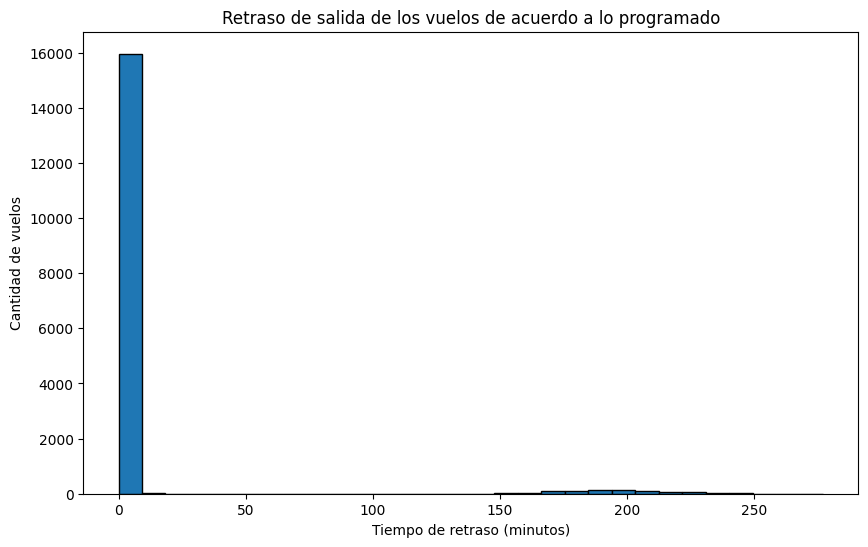

In [18]:

vuelos['tiempo_retraso_salida'] = (vuelos['actual_departure'] - vuelos['scheduled_departure']).dt.total_seconds() / 60

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['tiempo_retraso_salida'], bins=30, edgecolor='black')
plt.title('Retraso de salida de los vuelos de acuerdo a lo programado')
plt.xlabel('Tiempo de retraso (minutos)')
plt.ylabel('Cantidad de vuelos')
plt.show()

# En esta gráfica podemos observar que hay gran cantidad de retrasos en la salida de los vuelos, sin embargo, la mayoría de retrasos son de 5 a 10 minutos. También existen retraos de más de dos horas pero es una proporción muy ninima en relación al total de vuelos que tiene la aerolinea.

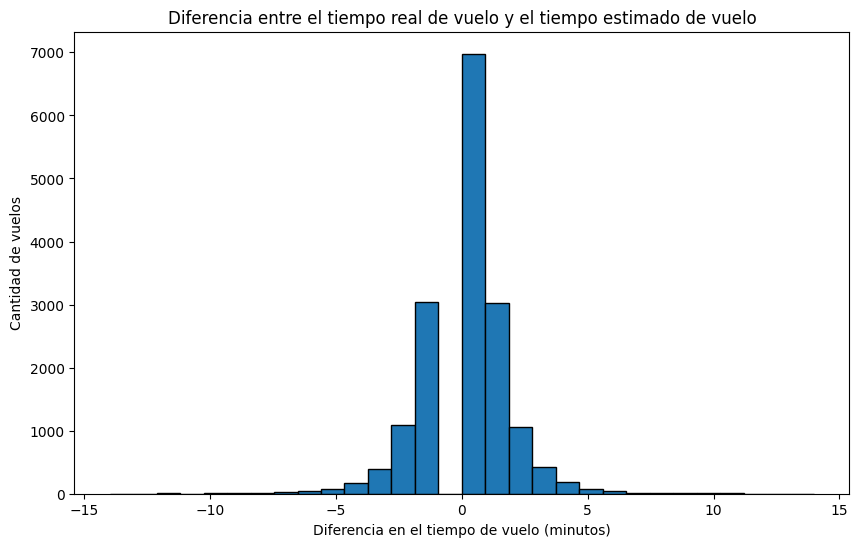

In [76]:
vuelos['diferencia_tiempo_vuelo'] = (vuelos['tiempo_real_vuelo'] - vuelos['tiempo_estimado_vuelo']).dt.total_seconds() / 60

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['diferencia_tiempo_vuelo'], bins=30, edgecolor='black')
plt.title('Diferencia entre el tiempo real de vuelo y el tiempo estimado de vuelo')
plt.xlabel('Diferencia en el tiempo de vuelo (minutos)')
plt.ylabel('Cantidad de vuelos')
plt.show()


# valores positivos representan que el vuelo duró mas de lo estimado y los valores negativos representan que el vuelo duró menos de lo estimado por la aerolinea.
# La diferencia del tiempo de vuelo real y el estimado oscila entre +/- 5 minutos. esto puede ser por condiciones meteorológicas, tráfico aereo, problemas tecnicos y controles de tráfico aereo


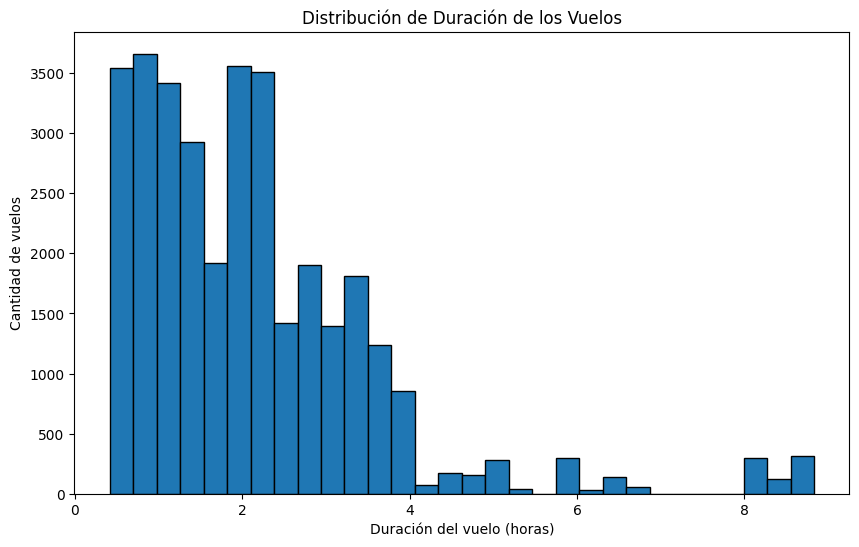

In [17]:
vuelos['tiempo_estimado_vuelo'] = vuelos['tiempo_estimado_vuelo'].dt.total_seconds() / 3600

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['tiempo_estimado_vuelo'], bins=30, edgecolor='black')
plt.title('Distribución de Duración de los Vuelos')
plt.xlabel('Duración del vuelo (horas)')
plt.ylabel('Cantidad de vuelos')
plt.show()

# podemos observar que la duración de la mayoría de vuelos de la aerolinea no superan las 4 horas, habiendo mayor concentración en los vuelos de no más de dos horas de duración.
# sin embargo la aeroliea tambien tiene vuelos con duración de 6 y 8 horas. 


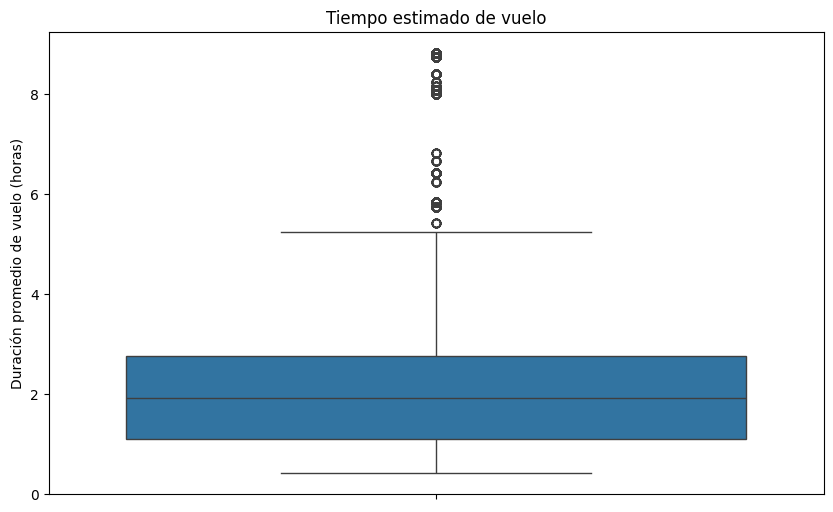

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(vuelos['tiempo_estimado_vuelo'])
plt.title('Tiempo estimado de vuelo')
plt.ylabel('Duración promedio de vuelo (horas)')
plt.show()

# En esta gráfica podemos observar que la duración promedio de los vuelos de la aerolinea es de dos horas.

ANALISIS DE VUELOS, AERONAVES, CANTIDAD DE ASIENTOS Y TIQUETES VENDIDOS

In [19]:
# Tabla aeronaves sin los nombres en ruso

aeronaves = pd.read_sql("select * from aircrafts_data;", conn)
aeronaves["model"] = aeronaves["model"].apply(json.loads)
aeronaves[["modelo_ingles", "modelo_ruso"]] = aeronaves["model"].apply(lambda x: pd.Series([x["en"], x["ru"]]))
aeronaves = aeronaves.drop("model", axis=1)
aeronaves = aeronaves.drop("modelo_ruso", axis=1)
aeronaves

,aircraft_code,range,modelo_ingles
0,773,11100,Boeing 777-300
1,763,7900,Boeing 767-300
2,SU9,3000,Sukhoi Superjet-100
3,320,5700,Airbus A320-200
4,321,5600,Airbus A321-200
5,319,6700,Airbus A319-100
6,733,4200,Boeing 737-300
7,CN1,1200,Cessna 208 Caravan
8,CR2,2700,Bombardier CRJ-200


In [20]:
# creamos una nueva tabla relacionando la informacion de aeronaves y vuelos

columnas =['aircraft_code','flight_id','flight_no','scheduled_departure','scheduled_arrival','departure_airport','arrival_airport','status','modelo_ingles','actual_departure','actual_arrival']
vuelos_aeronaves = pd.merge (vuelos,aeronaves, on='aircraft_code', how='inner')[columnas]
vuelos_aeronaves

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00


In [21]:
# Calculo de cantidad de asientos por aeronave

asientos =  pd.read_sql("select * from seats;", conn)
asientos_vuelo = asientos.groupby('aircraft_code')['seat_no'].count()
asientos_vuelo = asientos_vuelo.reset_index(name='seat_count')
asientos_vuelo

,aircraft_code,seat_count
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [22]:
# unificamos en una sola tabla la información de vuelos, aeronaves y asientos por aeronave
cantidad_asientos_vuelo = pd.merge( vuelos_aeronaves, asientos_vuelo, on='aircraft_code', how='left')
cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97
...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50


In [23]:
# realizamos el conteo de tiquetes de vuelo 

tiquetes_vuelo =  pd.read_sql("select * from ticket_flights;", conn)
conteo_pasajeros = tiquetes_vuelo.groupby('flight_id')['ticket_no'].count()
conteo_pasajeros = conteo_pasajeros.reset_index(name='ticket_count')
conteo_pasajeros

,flight_id,ticket_count
0,1,79
1,2,101
2,3,97
3,5,93
4,6,101
...,...,...
22221,33117,16
22222,33118,16
22223,33119,4
22224,33120,13


In [24]:
# integramos esta información a nuesta tabla de vuelos y creamos la colunma de cantidad de asientos sin vender y tasa de ocupación
cantidad_asientos_vuelo = pd.merge(cantidad_asientos_vuelo,conteo_pasajeros, on='flight_id', how='left')
cantidad_asientos_vuelo['asientos_sin_vender'] = cantidad_asientos_vuelo['seat_count'] - cantidad_asientos_vuelo['ticket_count']

cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count,ticket_count,asientos_sin_vender
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116,2.0,114.0
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50,28.0,22.0
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222,41.0,181.0
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222,9.0,213.0
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97,15.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50,16.0,34.0
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50,16.0,34.0
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50,4.0,46.0
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50,13.0,37.0


In [28]:
# creamos la columna de la tasa de ocupación de los vuelos
cantidad_asientos_vuelo['tasa_ocupación']= cantidad_asientos_vuelo['ticket_count'] / cantidad_asientos_vuelo['seat_count']

cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count,ticket_count,asientos_sin_vender,tasa_ocupación
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116,2.0,114.0,0.017241
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50,28.0,22.0,0.560000
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222,41.0,181.0,0.184685
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222,9.0,213.0,0.040541
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97,15.0,82.0,0.154639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50,16.0,34.0,0.320000
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50,16.0,34.0,0.320000
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50,4.0,46.0,0.080000
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50,13.0,37.0,0.260000
